# Credit Card Default Prediction

This project aims to predict whether a credit card customer will default on their next payment. We will use the UCI Credit Card dataset and apply various machine learning techniques to build and evaluate predictive models.

## Data Loading and Initial Exploration

We start by loading the dataset and performing initial exploration to understand its structure and content.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Preprocessing
In this section, we will preprocess the dataset by:
- Replacing missing or erroneous values in the 'EDUCATION' and 'MARRIAGE' columns.
- Standardizing numerical features to ensure they contribute equally to the model.
- Handling class imbalance using SMOTE to oversample the minority class (defaults).


In [5]:
# Replacing the values 0, 5, and 6 with 1
# This is done because 0, 5, and 6 are unknown values
df["EDUCATION"] = df["EDUCATION"].replace({0: 1, 5: 1, 6: 1})
df["EDUCATION"].value_counts()

EDUCATION
2    14030
1    10930
3     4917
4      123
Name: count, dtype: int64

In [8]:
# Doing a simiilar thing with marriage because the value of 0 is unknown
df["MARRIAGE"] = df["MARRIAGE"].replace({0: 1})
df["MARRIAGE"].value_counts()


MARRIAGE
2    15964
1    13713
3      323
Name: count, dtype: int64

In [9]:
# Define features (X) and target (y)
X = df.drop(["default.payment.next.month"], axis=1)
y = df["default.payment.next.month"]
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [10]:
# Normalizing the features to have a unit standard deviation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Handling Class Imbalance

The dataset has an imbalance in the target variable, with more non-defaults than defaults. We use SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.

In [16]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

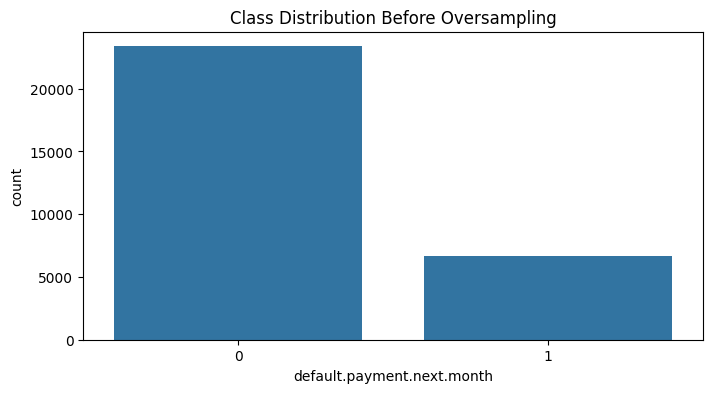

In [17]:
# Before oversampling
plt.figure(figsize=(8, 4))
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Class Distribution Before Oversampling')
plt.show()

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

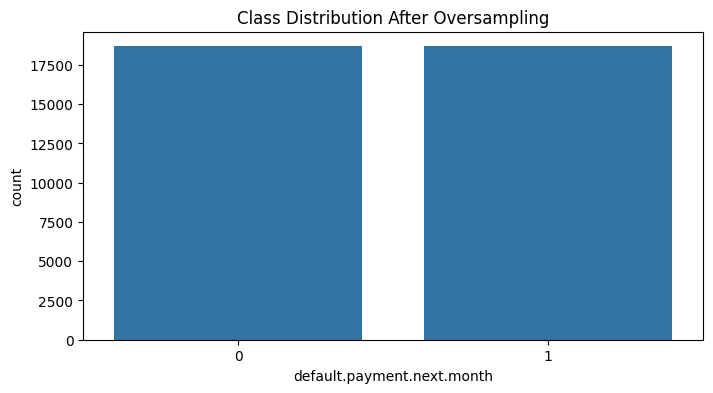

In [19]:
# After oversampling
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title('Class Distribution After Oversampling')
plt.show()

## Model Training: Logistic Regression

Logistic Regression is chosen as a baseline model due to its simplicity and interpretability. We train the model and evaluate its performance using a confusion matrix.

In [20]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)

# Predicting the model
pred_logit = logit.predict(X_test)

In [21]:
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logit model is: 0.6871666666666667
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      4687
           1       0.38      0.65      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.71      6000



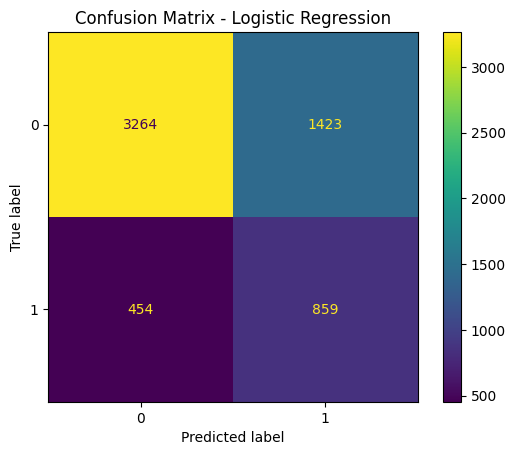

In [22]:
# Logistic Regression Confusion Matrix
cm_logit = confusion_matrix(y_test, pred_logit)
disp_logit = ConfusionMatrixDisplay(confusion_matrix=cm_logit)
disp_logit.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## Model Training: Random Forest

Random Forest is chosen for its robustness and ability to handle complex data interactions. We train the model and evaluate its performance using a confusion matrix.

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Fitting the model
rf.fit(X_train, y_train)

# Predicting the model
pred_rf = rf.predict(X_test)

In [24]:
print("The accuracy of logit model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

The accuracy of logit model is: 0.7945
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4687
           1       0.54      0.46      0.49      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000



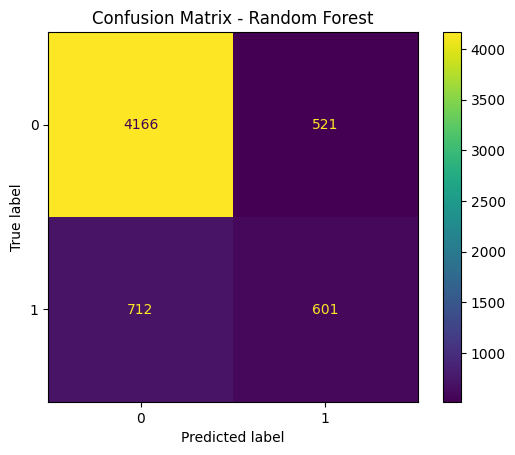

In [25]:
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Evaluating Model Performance

We use various metrics to evaluate the performance of our models, including accuracy, precision, recall, and ROC AUC. This helps us understand how well the models are performing and compare them effectively.

# Cross-Validation
To ensure our model's performance is robust and generalizes well to unseen data, we perform 10-fold cross-validation. This provides an average accuracy score that reflects the model's ability to perform across different subsets of the data.

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(rf, X, y, cv=10)

In [32]:
print(f"10-fold cross validation score: {float(score.mean()):.2f}")

10-fold cross validation score: 0.82


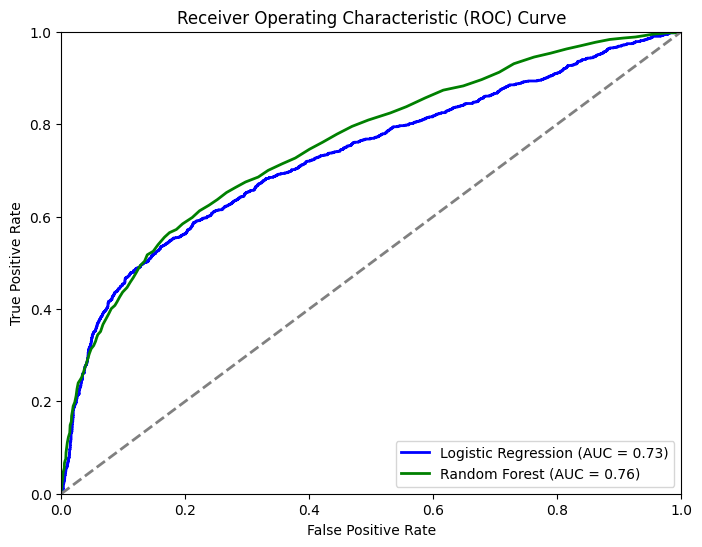

In [28]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression ROC Curve
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit.predict_proba(X_test)[:, 1])
roc_auc_logit = auc(fpr_logit, tpr_logit)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logit, tpr_logit, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logit:.2f})')

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [27]:
import numpy as np

# Sample user data
sample_user_data = np.array([1, 20000, 2, 2, 1, 24, 2, 2, -1, -1, -2, -2, 3913, 3102, 689, 0, 0, 0, 0, 689, 0, 0, 0, 0]).reshape(1, -1)

# Predict the probability of default
probability = rf.predict_proba(sample_user_data)

probability_of_default = probability[0][1]

print(f"Probability of default: {probability_of_default:.2f}")

Probability of default: 0.54
